# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# azdias: print the number of rows and columns
print('Rows: {} \
\nColumns: {}'.format(azdias.shape[0], azdias.shape[1]))

azdias.describe(include='all').T

Rows: 891221 
Columns: 85


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGER_TYP,891221,NaN,NaN,NaN,-0.358435,1.19872,-1,-1,-1,-1,3
ALTERSKATEGORIE_GROB,891221,NaN,NaN,NaN,2.7774,1.06877,1,2,3,4,9
ANREDE_KZ,891221,NaN,NaN,NaN,1.5221,0.499512,1,1,2,2,2
CJT_GESAMTTYP,886367,NaN,NaN,NaN,3.63284,1.59502,1,2,4,5,6
FINANZ_MINIMALIST,891221,NaN,NaN,NaN,3.07453,1.32105,1,2,3,4,5
FINANZ_SPARER,891221,NaN,NaN,NaN,2.82104,1.46475,1,1,3,4,5
FINANZ_VORSORGER,891221,NaN,NaN,NaN,3.40111,1.32213,1,3,3,5,5
FINANZ_ANLEGER,891221,NaN,NaN,NaN,3.03333,1.5296,1,2,3,5,5
FINANZ_UNAUFFAELLIGER,891221,NaN,NaN,NaN,2.87417,1.48673,1,2,3,4,5
FINANZ_HAUSBAUER,891221,NaN,NaN,NaN,3.07512,1.35325,1,2,3,4,5


In [4]:
# azdias: print the first few rows
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [5]:
# feat_info: print the number of rows and columns
print('Rows: {} \
\nColumns: {}'.format(feat_info.shape[0], feat_info.shape[1]))

feat_info.describe(include='all').T

Rows: 85 
Columns: 4


,count,unique,top,freq
attribute,85,85,W_KEIT_KIND_HH,1
information_level,85,9,person,43
type,85,5,ordinal,49
missing_or_unknown,85,9,[-1],26


In [6]:
# feat_info: print the first few rows
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [7]:
# Identify missing or unknown data values and convert them to NaNs
azdias.isna().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [8]:
# Functional approach
# def missing_dict_fun(df=feat_info, key_column='attribute', value_column='missing_or_unknown'):
#     """
#     Function that takes in a dataframe and returns a dictionary of the missing values indicated for an attribute
    
#     : param df: Pandas dataframe
#     : param key_column: name of column whose values will associate with the missing value codes
#     : param value_column: name of column with the missing value codes
    
#     : return missing_dict: dictionary of column names as keys and missing value codes as values
#     """
#     count = 0
#     mt_dict = {}
    
#     for attribute in df.loc[:, key_column]:
#         mt_dict[attribute] = df[df[key_column] == attribute][value_column][count]
#         if len(mt_dict[attribute]) > 2:
#             mt_dict[attribute] = mt_dict[attribute].replace('[', '')
#             mt_dict[attribute] = mt_dict[attribute].replace(']', '')
#             mt_dict[attribute] = mt_dict[attribute].split(',')
#             for i in range(len(mt_dict[attribute])):
#                 try:
#                     mt_dict[attribute][i] = eval(mt_dict[attribute][i])
#                 except:
#                     break
#         else:
#             mt_dict[attribute] = []
#         count +=1
#     missing_dict = mt_dict
    
#     return missing_dict

def check_int(value):
  try:
    int(value)
    return True
  except ValueError:
    return False

In [9]:
# Simple approach (maybe)
missing_dict = {'nan_replace': feat_info['missing_or_unknown'].str.replace('[','') \
             .str.replace(']','').str.split(',').values
            }
value_codes = pd.DataFrame(missing_dict, index = feat_info['attribute'].values)
value_codes['nan_replace'] = value_codes.apply(lambda x: \
                                               [int(i) if check_int(i) == True else i for i in x[0]], axis=1)
print(value_codes.head())
# value_codes.head()
for column in azdias.columns:
    azdias[column] = azdias[column].replace(value_codes.loc[column][0], np.nan)

                     nan_replace
AGER_TYP                 [-1, 0]
ALTERSKATEGORIE_GROB  [-1, 0, 9]
ANREDE_KZ                [-1, 0]
CJT_GESAMTTYP                [0]
FINANZ_MINIMALIST           [-1]


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [10]:
## Perform an assessment of how much missing data there is in each column of the dataset
print(azdias.isna().sum().describe())
print()
azdias.isna().sum()

# Make NaN count table for columns with NaNs
null_data = azdias.isnull().sum()[azdias.isnull().sum() != 0]

data_dict = {'count': null_data.values, 'percent': np.round(null_data.values *100/azdias.shape[0],2)}

azdias_nans = pd.DataFrame(data=data_dict, index=null_data.index)
azdias_nans.sort_values(by='count', ascending=False, inplace=True)
azdias_nans

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64



,count,percent
TITEL_KZ,889061,99.76
AGER_TYP,685843,76.96
KK_KUNDENTYP,584612,65.60
KBA05_BAUMAX,476524,53.47
GEBURTSJAHR,392318,44.02
ALTER_HH,310267,34.81
KKK,158064,17.74
REGIOTYP,158064,17.74
W_KEIT_KIND_HH,147988,16.61
KBA05_ANTG3,133324,14.96


In [11]:
# # Investigate patterns in the amount of missing data in each column.
# fig, ax = plt.subplots(figsize=(21, 14))
# sns.heatmap(azdias.isnull(), yticklabels= False, cbar=False, cmap = 'coolwarm')
# plt.show()

In [12]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

## Finding interquartile ranges: https://www.varsitytutors.com/algebra_1-help/how-to-find-interquartile-range
nan_count = np.asarray(azdias.isna().sum().tolist())

nan_mid = np.median(nan_count)
low_mid = np.median(nan_count[nan_count < nan_mid])
high_mid = np.median(nan_count[nan_count > nan_mid])
iqr = high_mid - low_mid

outliers = [low_mid - 1.5*iqr, high_mid + 1.5*iqr]

## Determine which columns have enoungh NaN to be considered outliers
keep_columns = []
outlier_columns =[]
for column in azdias.columns:
    if outliers[0] < azdias[column].isna().sum() < outliers[1]:
        keep_columns.append(column)
    else:
        outlier_columns.append(column)

## Create a dataset without outlier columns
azdias_clean = azdias.drop(outlier_columns, axis=1)

In [13]:
## Simple report output
print('Outlier columns removed from data: {}\
\nLower outlier value: {}\
\nUpper outerlier value: {}'.format(outlier_columns, outliers[0], outliers[1]))
print()
print('AGER_TYP missing: {}\
\nGEBURTSJAHR missing: {}\
\nTITEL_KZ missing: {}\
\nALTER_HH missing: {}\
\nKK_KUNDENTYP missing: {}\
\nKBA05_BAUMAX missing: {}'.format(azdias['AGER_TYP'].isna().sum(),
                                   azdias['GEBURTSJAHR'].isna().sum(),
                                   azdias['TITEL_KZ'].isna().sum(),
                                   azdias['ALTER_HH'].isna().sum(),
                                   azdias['KK_KUNDENTYP'].isna().sum(),
                                   azdias['KBA05_BAUMAX'].isna().sum()))
print()
for column in outlier_columns:
    print("="*50)
    print(feat_info[feat_info['attribute']==column][['attribute', 'information_level', 'type']])

Outlier columns removed from data: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
Lower outlier value: -174772.5
Upper outerlier value: 291287.5

AGER_TYP missing: 685843
GEBURTSJAHR missing: 392318
TITEL_KZ missing: 889061
ALTER_HH missing: 310267
KK_KUNDENTYP missing: 584612
KBA05_BAUMAX missing: 476524

  attribute information_level         type
0  AGER_TYP            person  categorical
      attribute information_level     type
11  GEBURTSJAHR            person  numeric
   attribute information_level         type
40  TITEL_KZ            person  categorical
   attribute information_level      type
43  ALTER_HH         household  interval
       attribute information_level         type
47  KK_KUNDENTYP         household  categorical
       attribute information_level   type
64  KBA05_BAUMAX     microcell_rr3  mixed


#### Discussion 1.1.2: Assess Missing Data in Each Column
See above for specifics of columns removed

<li> Six columns were removed based on being outliers in the number of NaN values.
<li> Half of the columns are person-level data
<li> A third of the columns are household-level data
<li> Seems to be a pattern of missing values based on person and household

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

count    891221.000000
mean          9.396018
std          13.971829
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          54.000000
dtype: float64


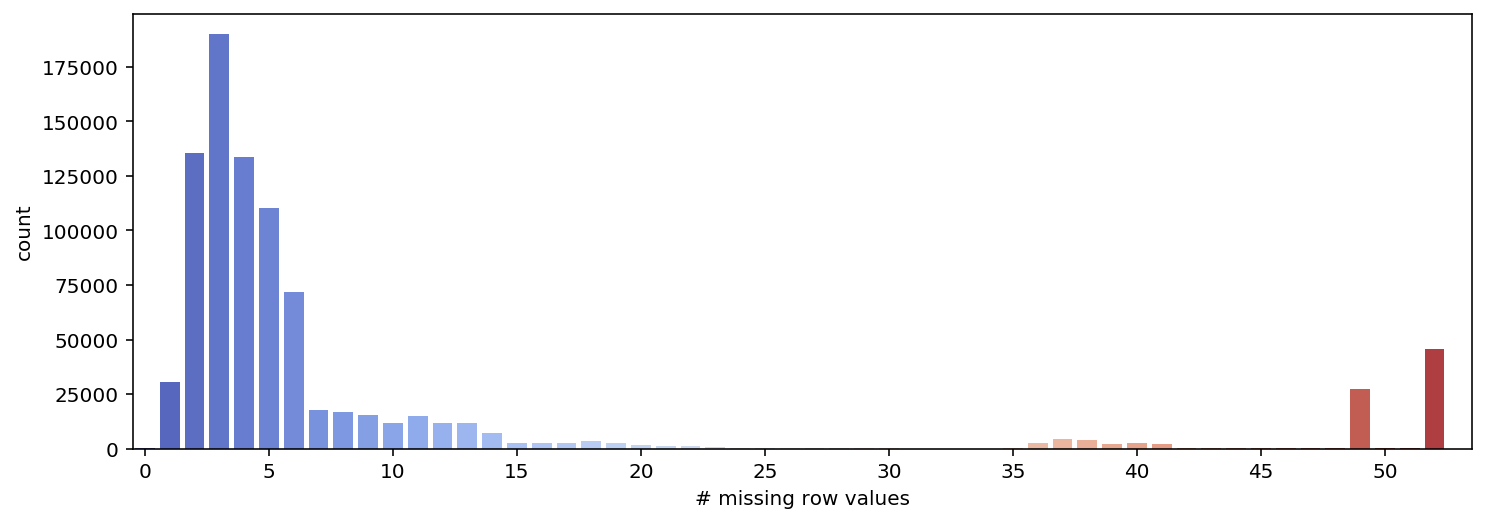

In [14]:
# How much data is missing in each row of the dataset?
nan_row_num = azdias.isnull().sum(axis=1)
print(nan_row_num.describe())

import matplotlib.ticker as ticker

plt.figure(figsize=(12,4))
ax = sns.countplot(nan_row_num, palette='coolwarm')
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel('# missing row values')
plt.show()

In [15]:
## Write code to divide the data into two subsets based on the number of missing values in each row
azdias.isna().sum(axis=1).describe()
# Make a column in the dataframe to easily identify, simplify the subsetting
azdias_clean['missing_count'] = azdias_clean.isna().sum(axis=1)
azdias_clean['high_nan'] = 0
azdias_clean.loc[azdias_clean['missing_count'] > 35, 'high_nan'] = 1

print(azdias_clean[azdias_clean['high_nan']==1].shape)
print(azdias_clean[azdias_clean['high_nan']==0].shape)

low = azdias_clean[azdias_clean['high_nan'] == 0].drop(['missing_count', 'high_nan'], axis=1)
high = azdias_clean[azdias_clean['high_nan'] == 1].drop(['missing_count', 'high_nan'], axis=1)

(75233, 81)
(815988, 81)


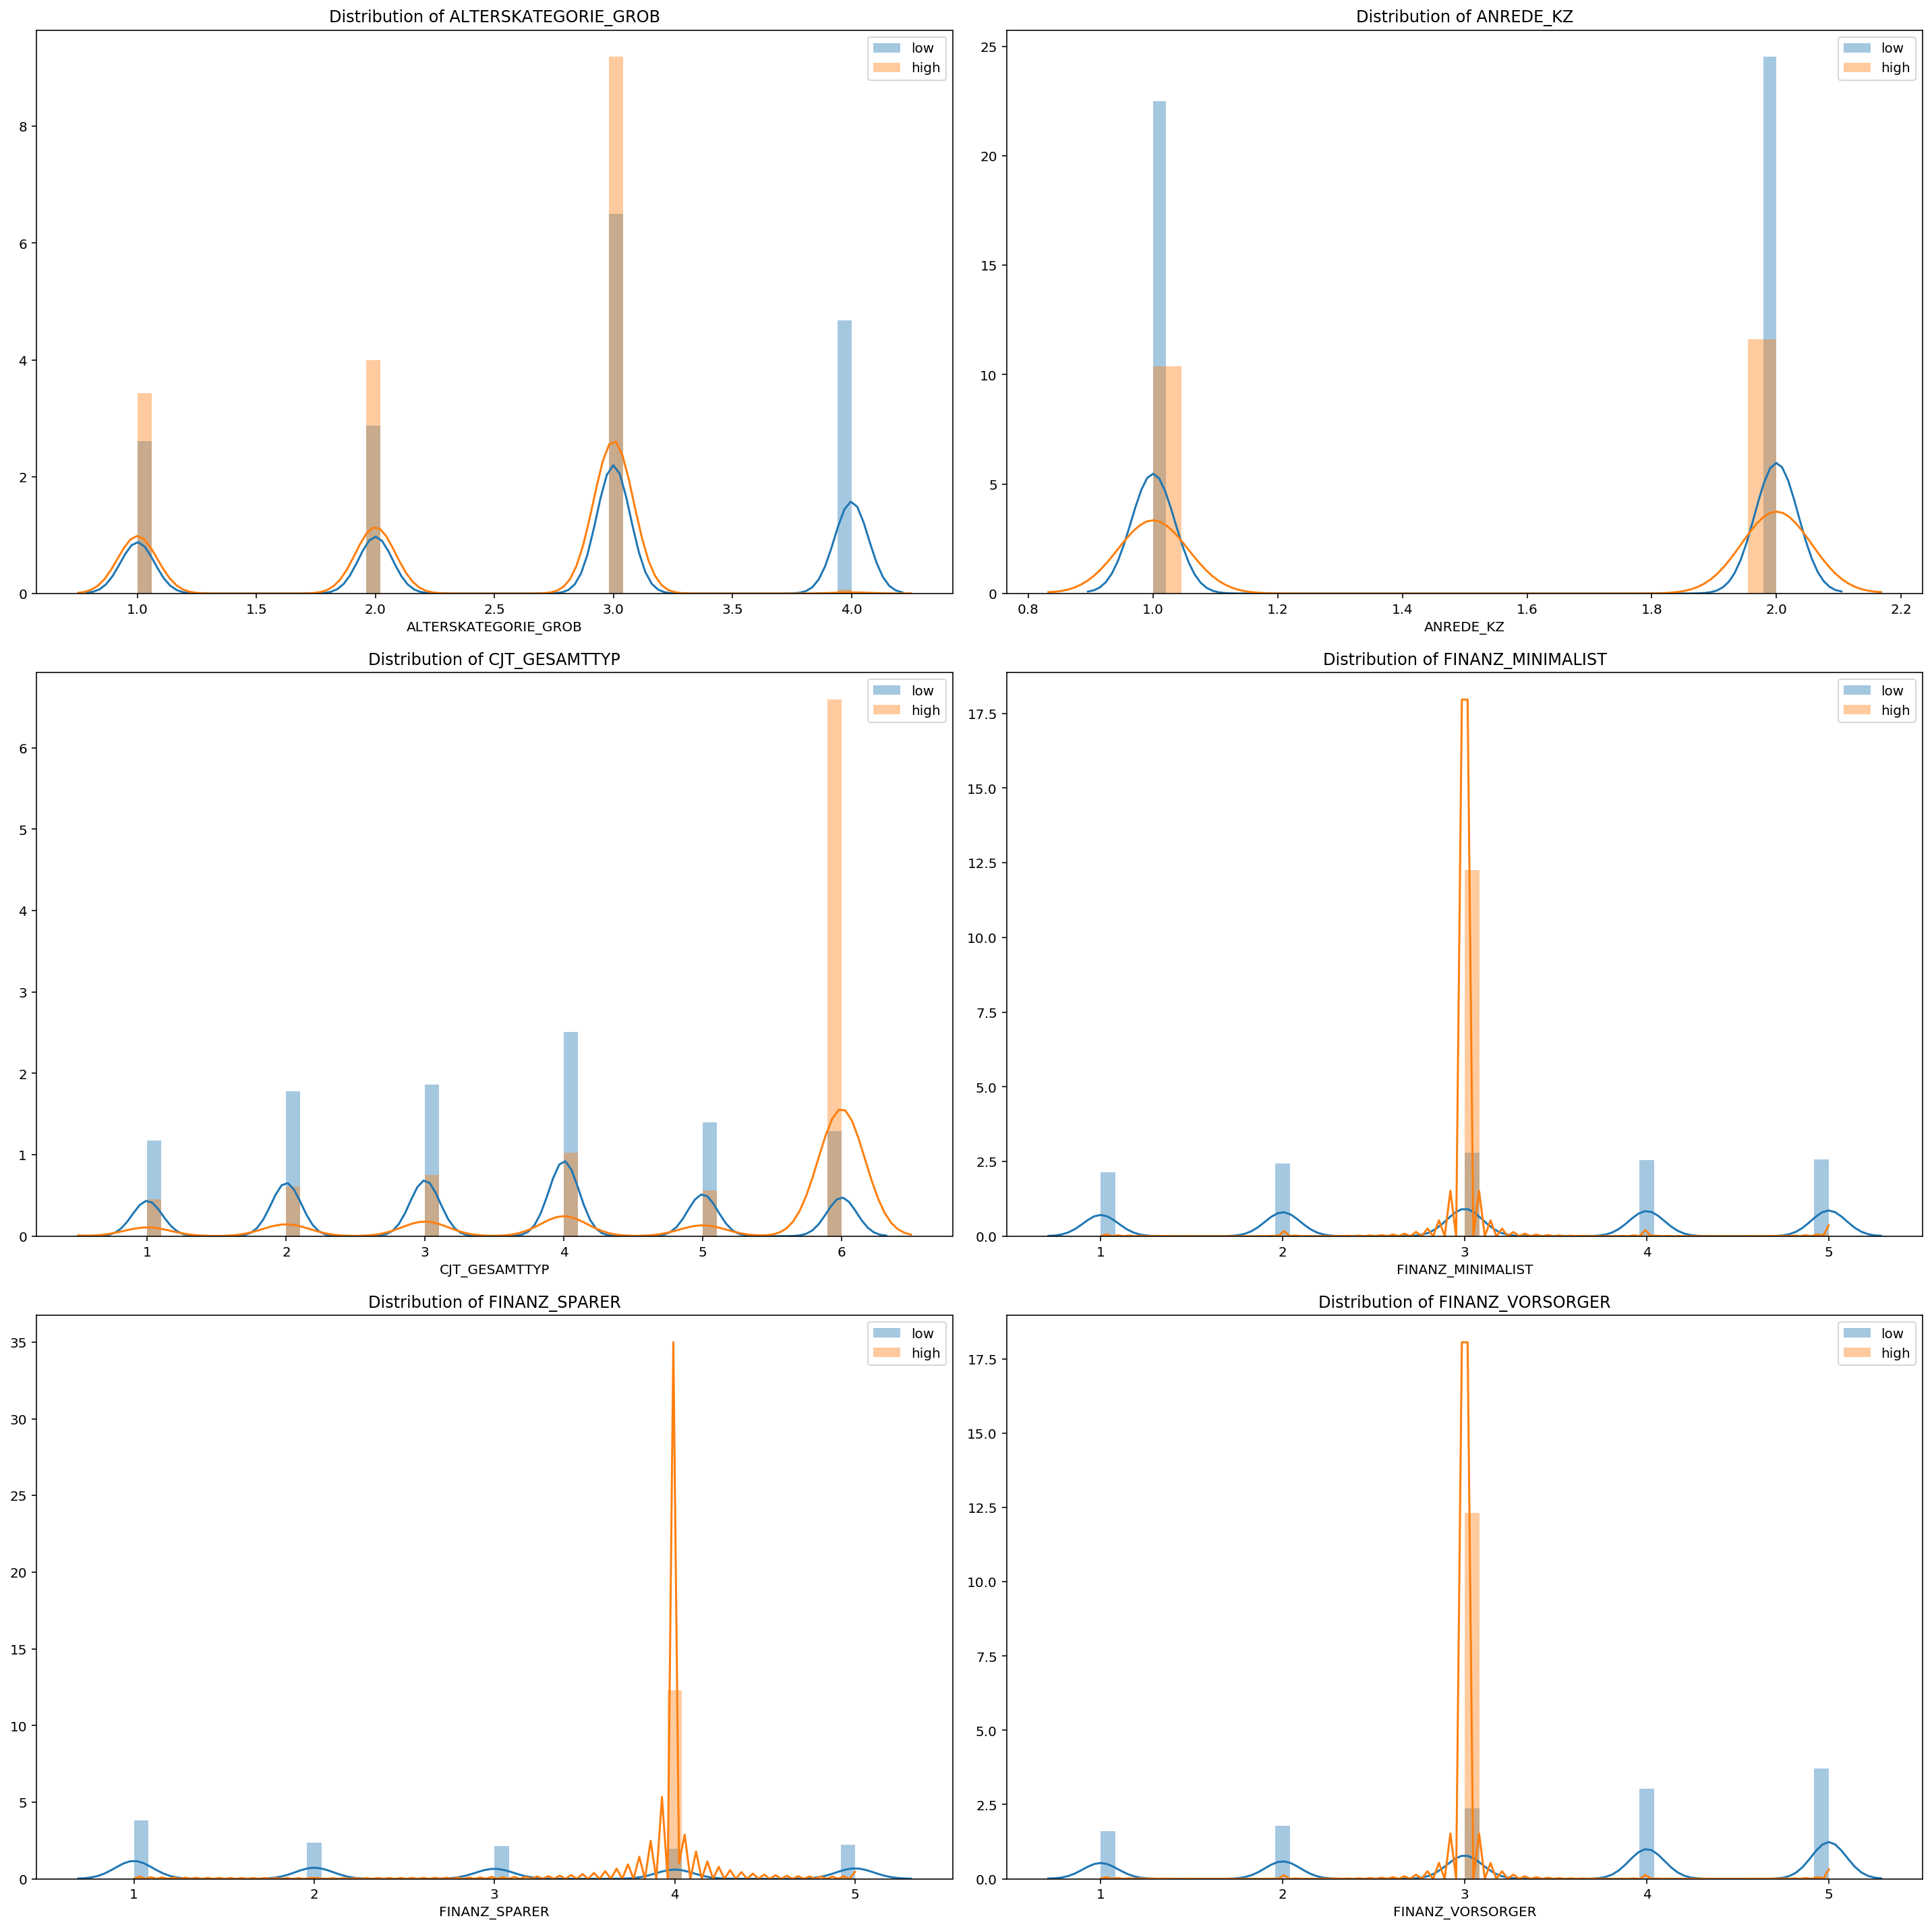

In [16]:
# ## Compare the distribution of values for at least five columns where there are no or few missing values, 
# ## between the two subsets
plt.figure(figsize=(20,20))
for i, column in enumerate(azdias_clean.columns[:6]):
    plt.subplot(3, 2, i+1)
    sns.distplot(low[low[column].notnull()][column], label='low')
    sns.distplot(high[high[column].notnull()][column], label='high')
    plt.title('Distribution of {}'.format(column))
    plt.tight_layout()
    plt.legend()

In [17]:
## Compare those of no missing values from both
column_names = []
for column in list(low.columns):
    null1 = low.loc[:,column].isnull().sum()
    null2 = high.loc[:,column].isnull().sum()
    if(null1+null2 == 0):
        column_names.append(column)
print(column_names)

['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP']


In [18]:
def compare_dist(column):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    ax1.set_title('low')
    ax2.set_title('high')
    sns.countplot(low[column], ax=ax1)
    sns.countplot(high[column], ax=ax2)
    plt.show()

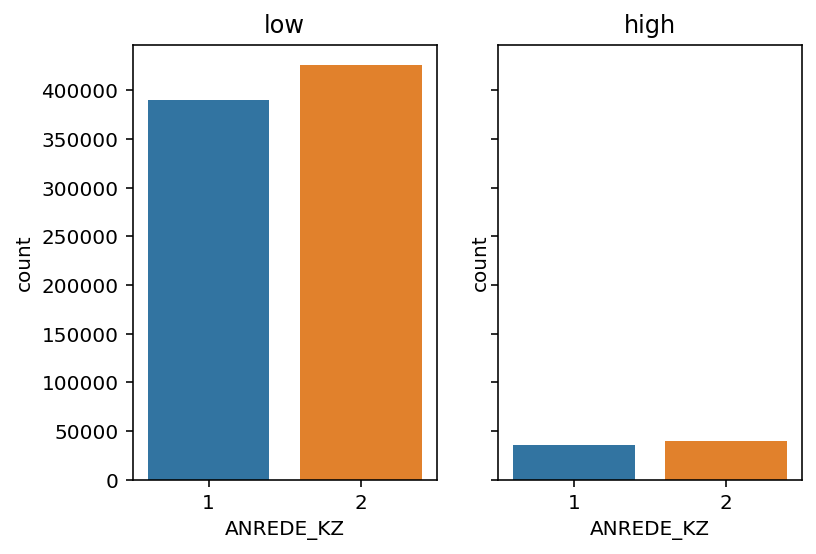

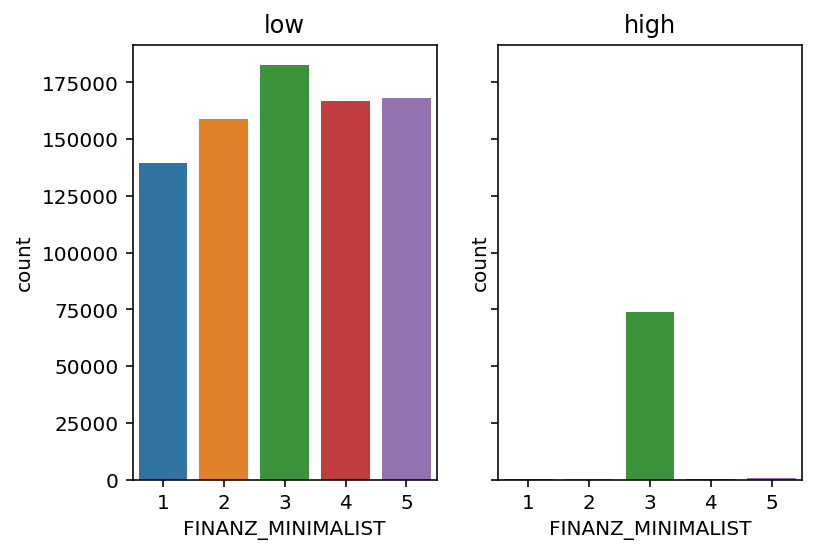

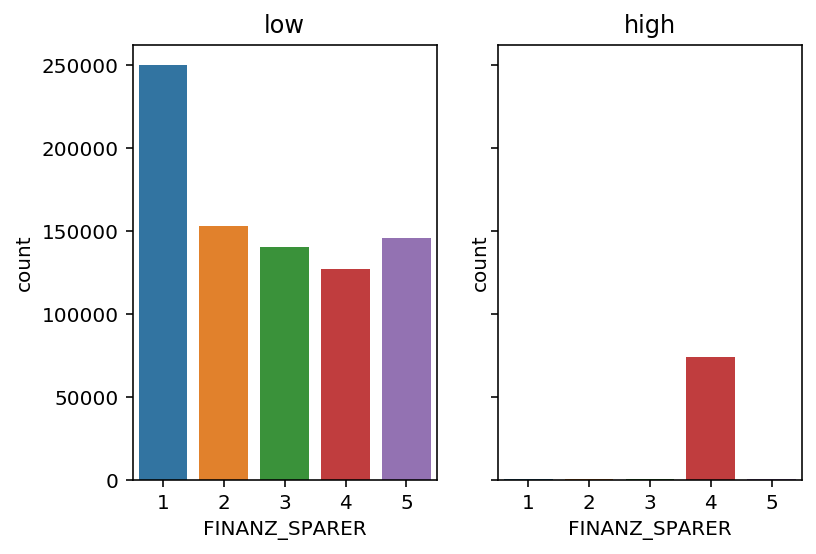

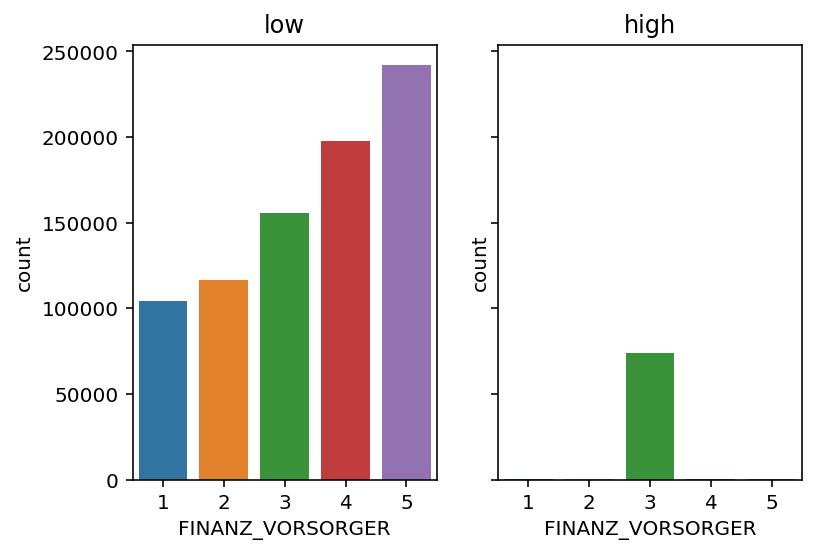

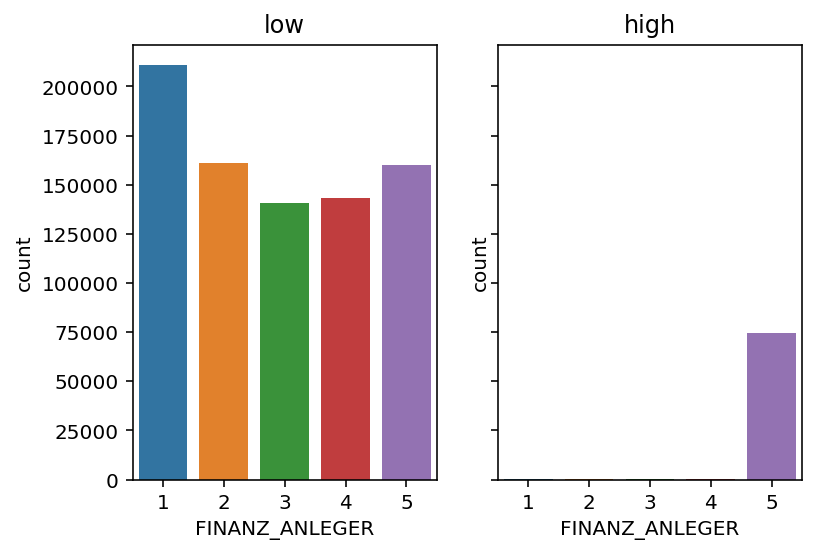

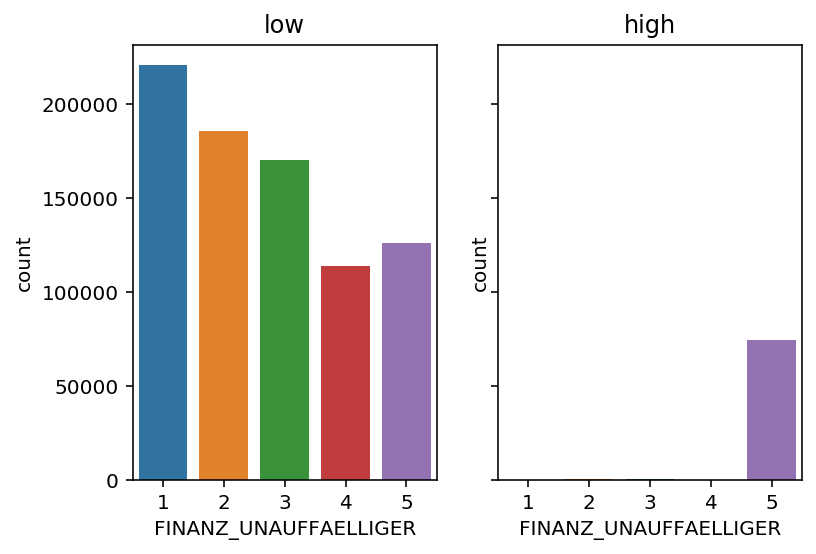

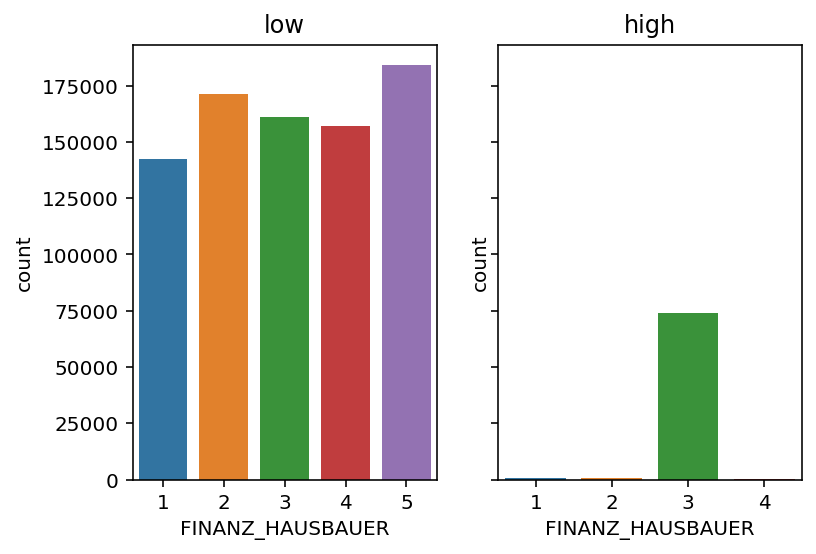

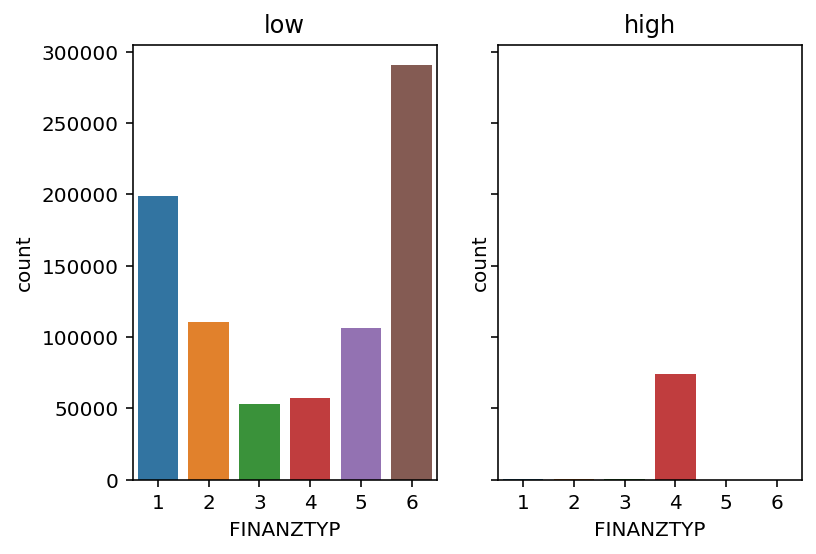

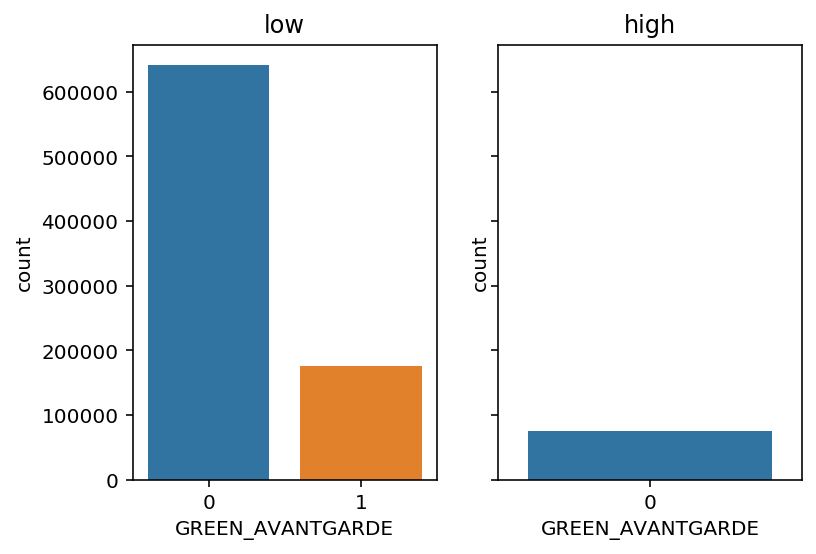

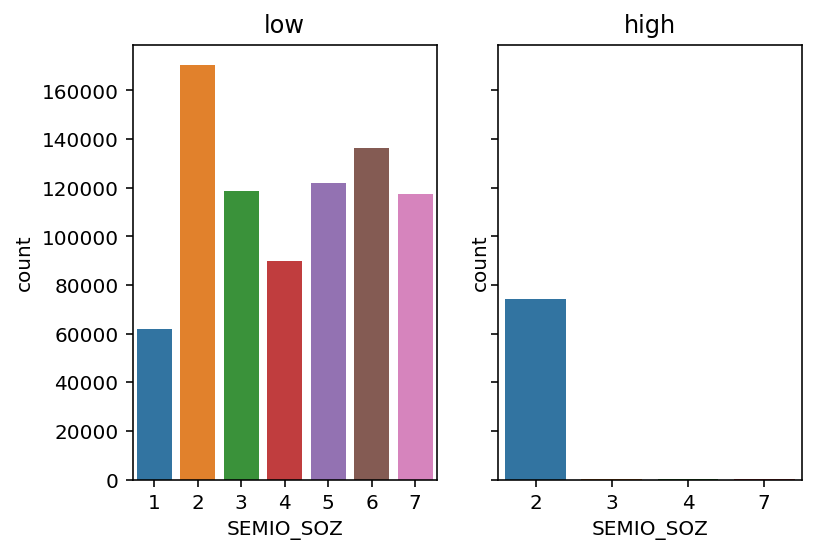

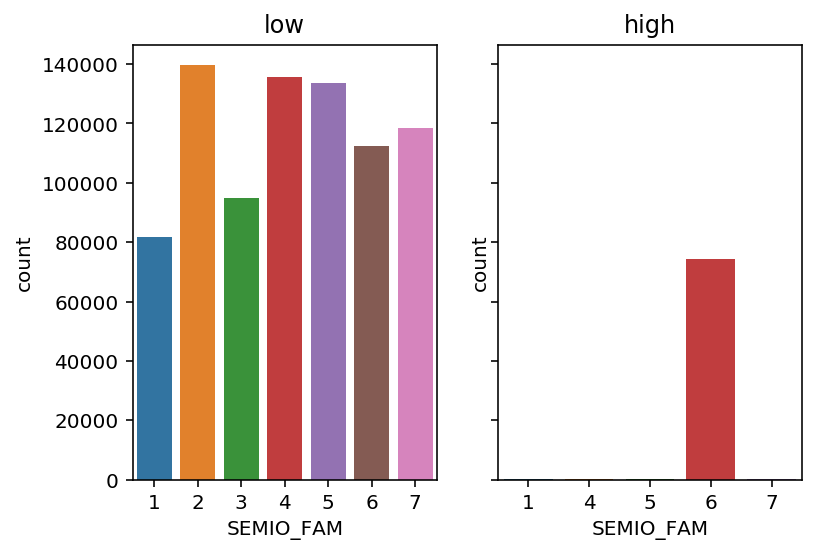

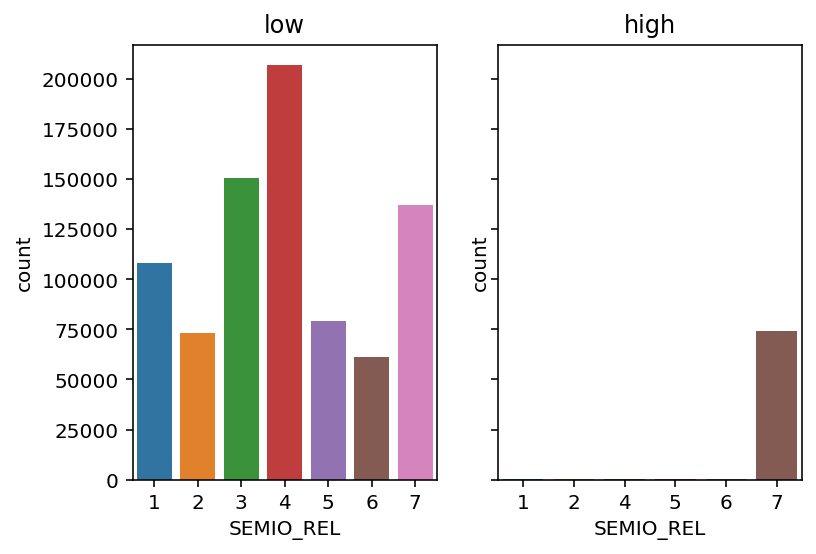

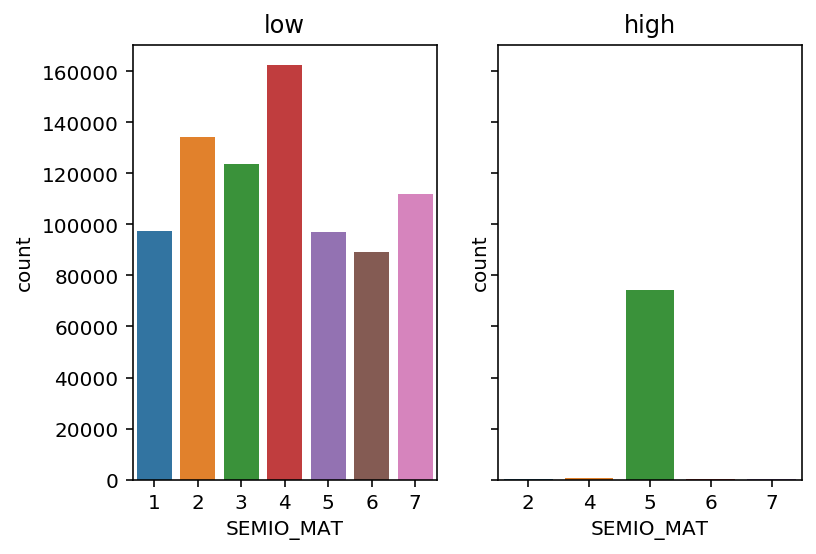

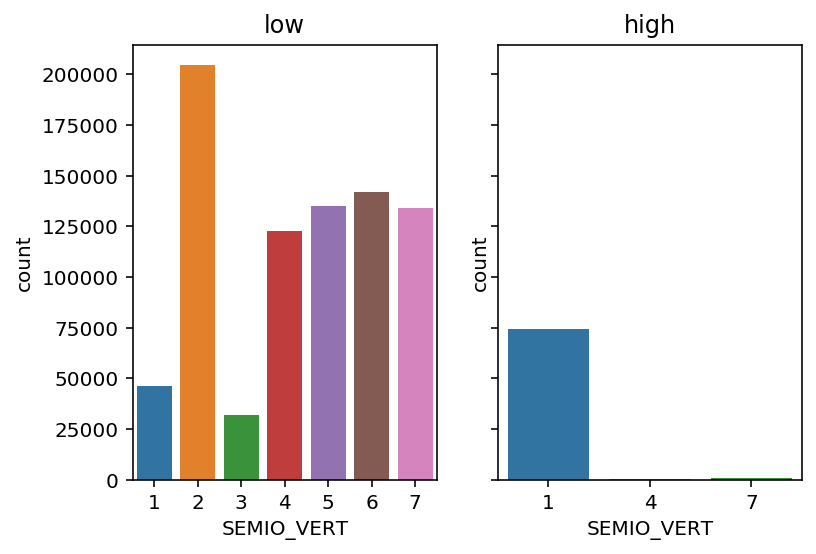

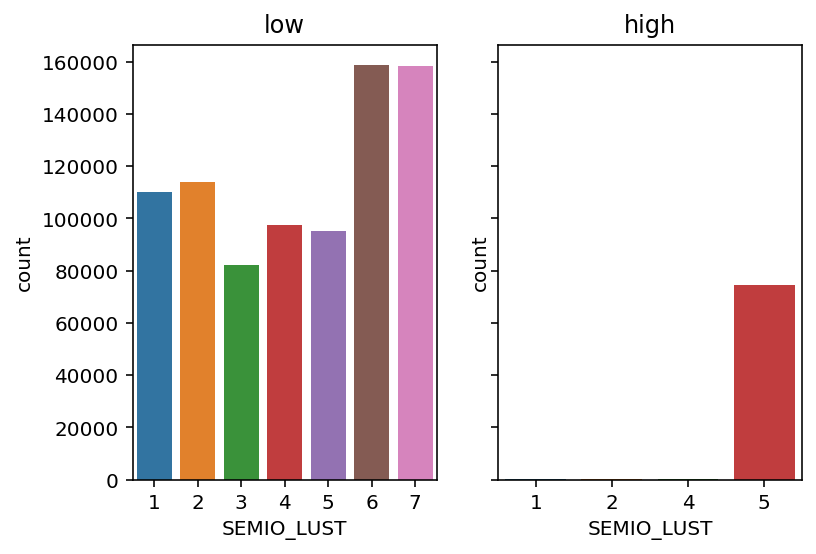

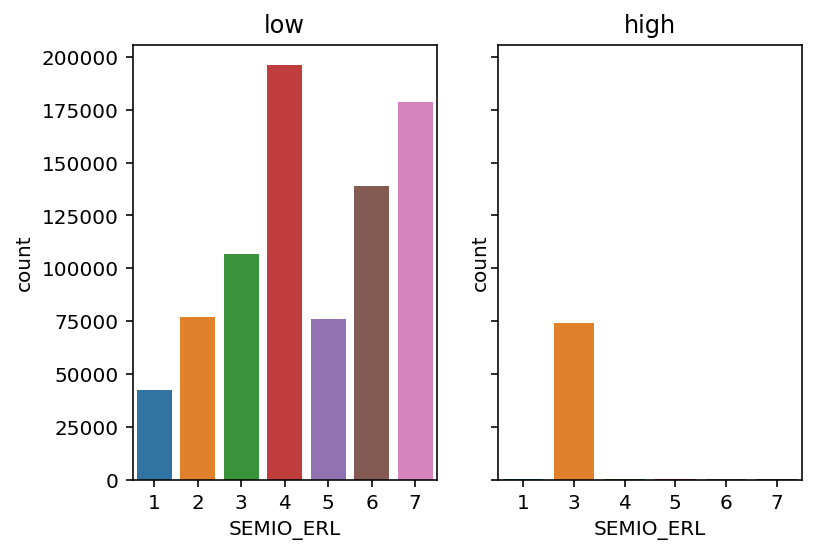

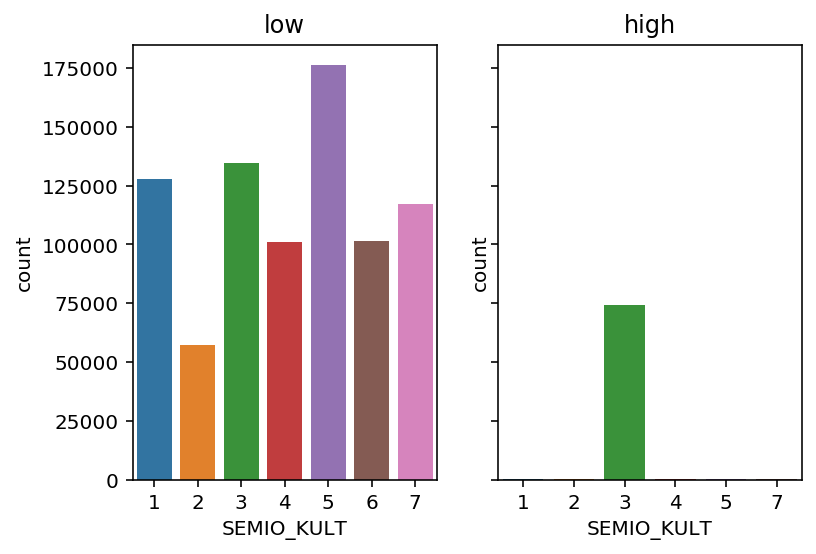

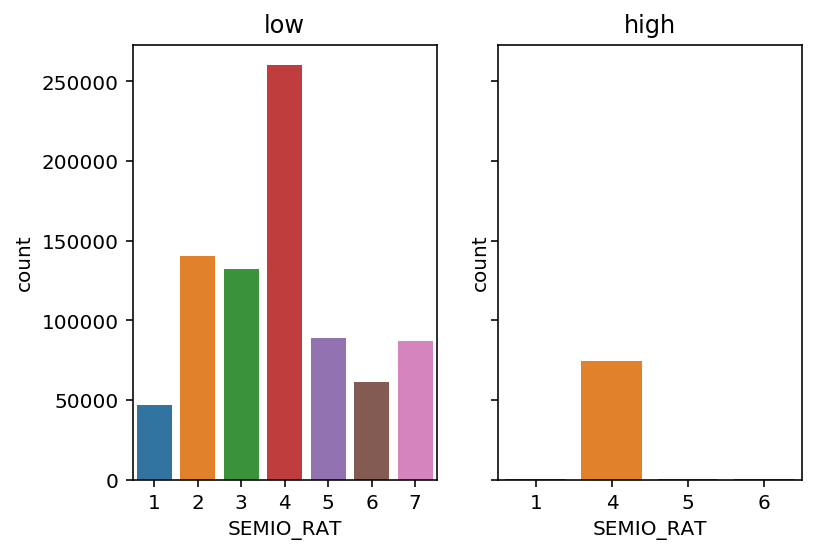

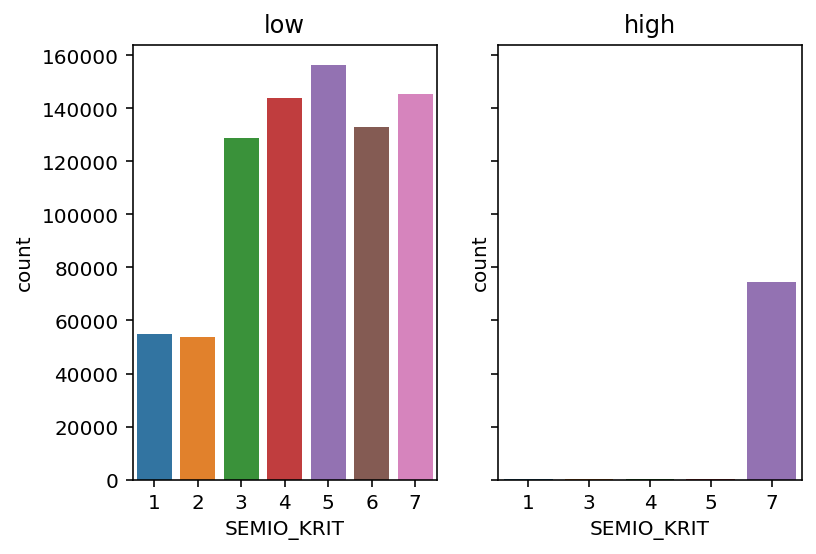

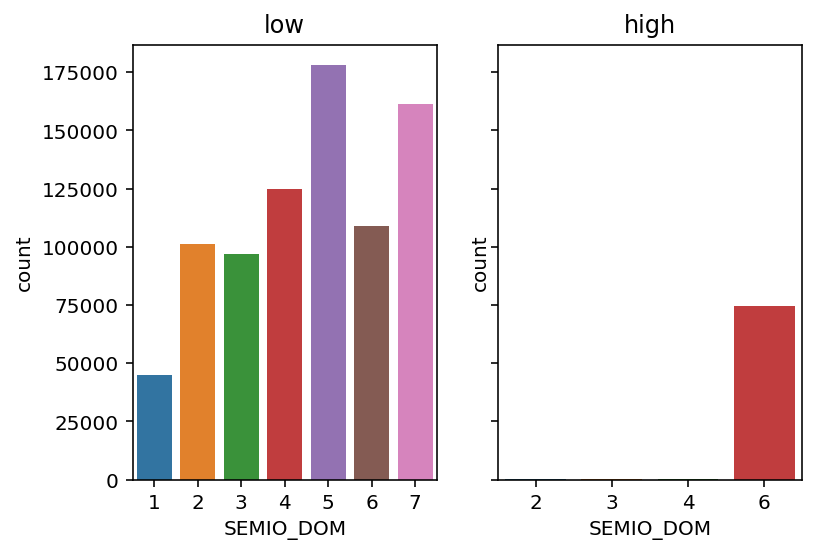

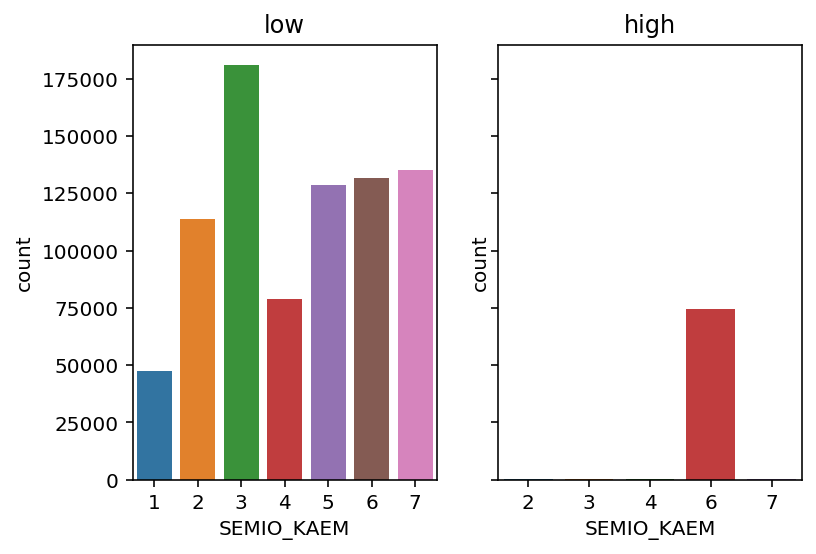

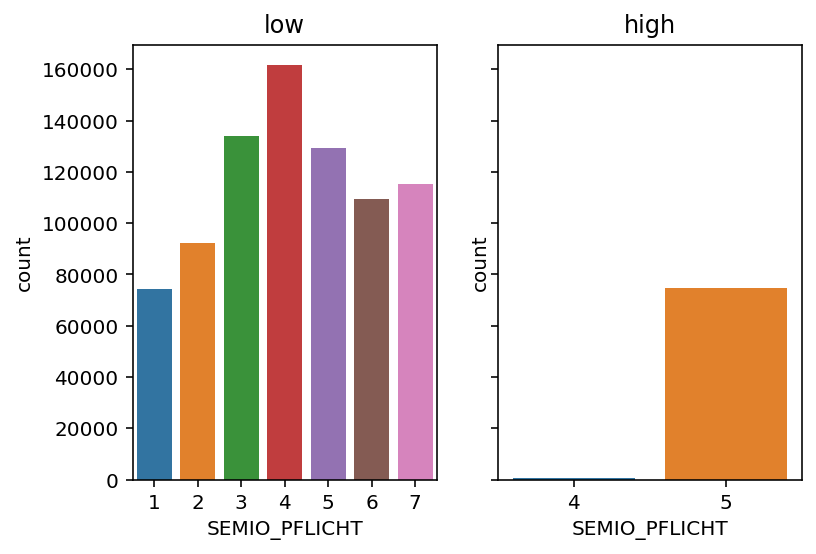

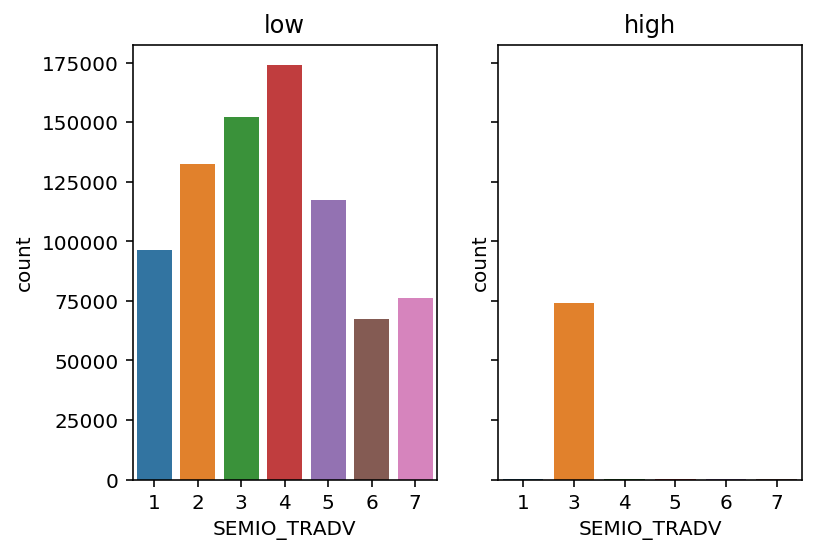

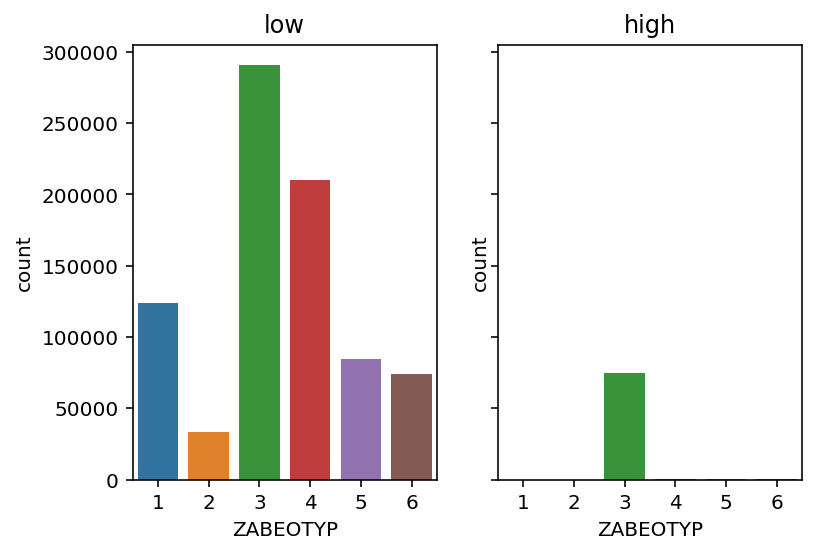

In [19]:
for column in column_names:
    compare_dist(column)

#### Discussion 1.1.3: Assess Missing Data in Each Row

**Report your observations regarding missing data in rows**
The distributions are not the same. The data with lots of missing values follow a different distribution than those with less missing values. 

**Are the data with lots of missing values are qualitatively different from data with few or no missing values?**
They may be qualitatively different. When we look at columns that have no missing values in both the low and high NaN value observations, we can see they follow different distributions.

**Conclusion**
Dropping the NaN data will disort the inference; inmputing values will be more appropriate.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column (`feat_info['type']`) of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [20]:
# How many features are there of each data type?
print(feat_info['type'].value_counts())
print()
print('Categorical variables are: ')
print(feat_info[feat_info['type'] == 'categorical']['attribute'])
cat_var = list(feat_info[feat_info['type'] == 'categorical']['attribute'])
print()
print('Mixed variables are: ')
print(feat_info[feat_info['type'] == 'mixed']['attribute'])
mixed_var = list(feat_info[feat_info['type'] == 'mixed']['attribute'])

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

Categorical variables are: 
0             AGER_TYP
2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
40            TITEL_KZ
41            VERS_TYP
42            ZABEOTYP
47        KK_KUNDENTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

Mixed variables are: 
15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
22    PRAEGENDE_JUGENDJAHRE
56                 WOHNLAGE
59          CAMEO_INTL_2015
64             KBA05_BAUMAX
79              PLZ8_BAUMAX
Name: attribute, dtype: object


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [21]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
binary = []
multi = []
for column in cat_var:
    if column in list(low.columns):
        print(column)
        print("="*23)
        print(low[column].describe().T)
        print('Number of NaN: {}'.format(low[column].isna().sum()))
        print("_"*23)
        if low[column].nunique() == 2:
            binary.append(column)
            print(low[column].value_counts())
        else:
            multi.append(column)
            print(low[column].value_counts())
    else:
        print('Variable outlier: {}'.format(column))
        print("_"*23)

low['ANREDE_KZ'] = low['ANREDE_KZ'].map({2:int(1), 1:int(0)})
low['VERS_TYP'] = low['VERS_TYP'].map({2.0:int(1), 1.0: int(0)})
low['OST_WEST_KZ'] = low['OST_WEST_KZ'].map({'W':int(1), 'O':int(0)})
low['SOHO_KZ'] = low['SOHO_KZ'].map({1.0:int(1), 0.0:int(0)})
# Re-encode categorical variable(s) to be kept in the analysis.
for column in multi:
    dummy = pd.get_dummies(low[column])
    low = pd.concat([low, dummy], axis=1)

print('Binary variables: {}'.format(binary))
print()
print('Multi-level variables: {}'.format(multi))
# Need to remove all "multi" columns at the end

Variable outlier: AGER_TYP
_______________________
ANREDE_KZ
count    815988.000000
mean          1.521540
std           0.499536
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: ANREDE_KZ, dtype: float64
Number of NaN: 0
_______________________
2    425570
1    390418
Name: ANREDE_KZ, dtype: int64
CJT_GESAMTTYP
count    811234.000000
mean          3.502488
std           1.537076
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           6.000000
Name: CJT_GESAMTTYP, dtype: float64
Number of NaN: 4754
_______________________
4.0    203232
3.0    150801
2.0    144186
5.0    113161
6.0    104395
1.0     95459
Name: CJT_GESAMTTYP, dtype: int64
FINANZTYP
count    815988.000000
mean          3.774705
std           2.074711
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           6.000000
Name: FINANZTYP, dtype: float64
Number

In [22]:
# # Fill in NaN with mean with rounding - without rounding the value is not within the categorical classes
# # If the values are not possible to be rounded (for whatever reason, likely being strings), then replace with mode obs
# def impute_avg(df, column):
#     try:
#         round_avg = round(df[column].astype(float).mean())
#         return df[column].fillna(round_avg)
#     except:
#         most_freq = df[var].value_counts().idxmax()
#         return df[var].fillna(most_freq)
# for var in multi:
#     if var in low.keys(): # If operation needs to be redone based on SOME column failing (one keeps doing so)
#         impute = impute_avg(low, var) # Replace NaN with rounded mean or most frequent
#         encode = pd.get_dummies(impute, prefix=var) # One-hot for each category
#         low = low.drop(var, axis=1) # Remove column that One-hots are created

#         for col in encode.columns: #insert new encoded columns into the dataset
#             low[col] = encode[col]

#### Discussion 1.2.1: Re-Encode Categorical Features

**Reporting your findings and decisions regarding categorical features**
1. Which ones did you keep:
> I elected to keep all variables from the cleaned dataset. I chose to because I already removed columns determined to be outliers based on the number of NaN values. I did not choose to segment based on low or high values of missing data by rows because imputation is meant to help control for this; ultimately filling all NaN values with some item.
2. which did you drop
> I dropped {'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'} based on the number of missing values they contained relative to the other columns. I determined the columns listed were outlier in their number of Nans by determining the interquartile ranges of the number of NaNs for the dataset as a whole (by columns) and using the statistical definition of a (mild) outlier being defined as one which is 1.5 times the distance from the first and third quartile.
3. What engineering steps did you perform
> * Converted strings to numeric/integer/float types
> * Determined distributions of variables under criteria of high/low missing data points
> * ~~Imputed values for missing values based on the expected value.~~
> > ~~That is, when numeric, I imputed the rounded average because even when the numbers are categorical and not indicative of quantities, the (rounded) average still lets me know what the expected (average) value is. I chose to round as the categorical variables don't take on continuous values (4 vs 4.2). For string categorical variables, I imputed the most frequently appearing. Another thought would be to determine some distribution of the discrete variables and impute variables in a bootstrap sense.~~
> > * Later on, I'm asked to use sklearn's Imputer, so I'm not doing this just now
> * Created dummy variables of categorical variables
> * Removed the original columns of the categorical variables

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

                attribute information_level   type missing_or_unknown
22  PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]



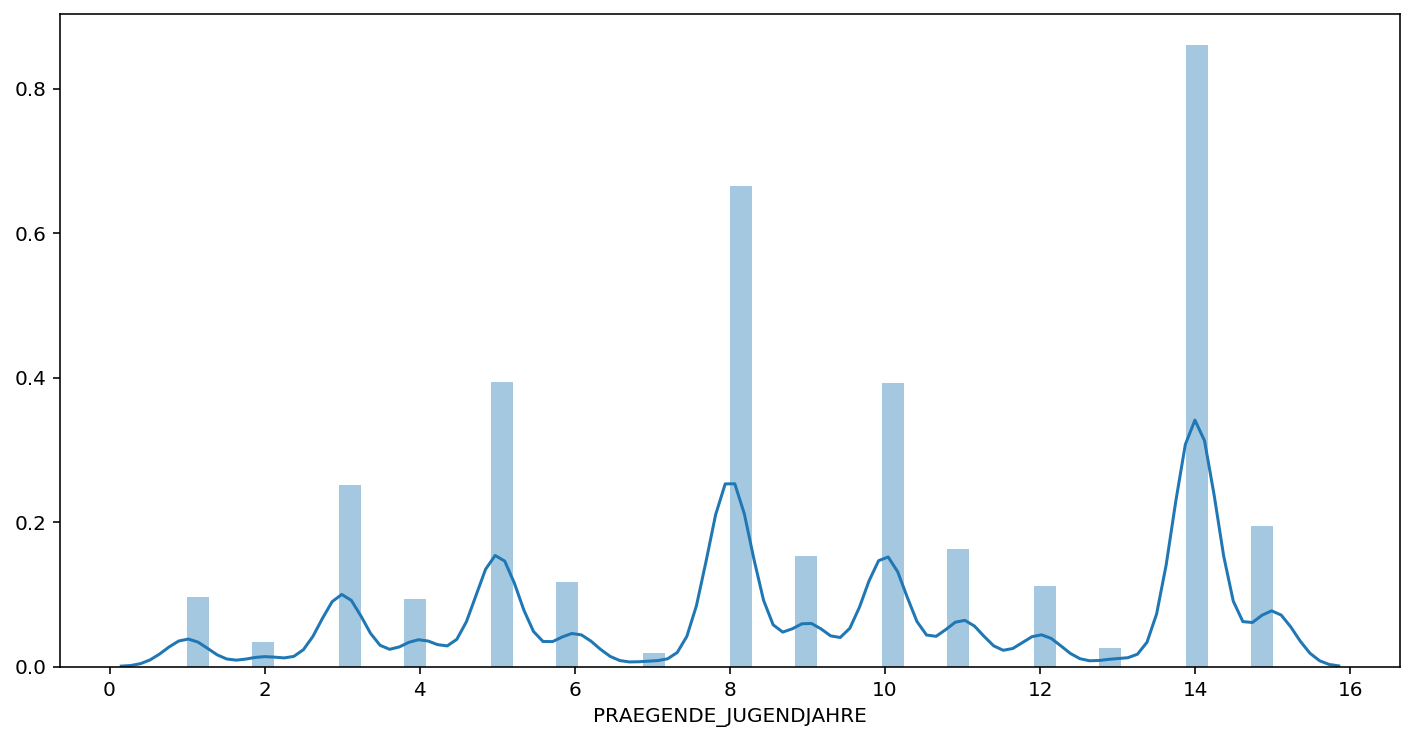

In [23]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
print(feat_info[feat_info['attribute'] == 'PRAEGENDE_JUGENDJAHRE'])
print()
plt.subplots(figsize=(12,6))
sns.distplot(low['PRAEGENDE_JUGENDJAHRE'].dropna(), kde=True)
plt.show()

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [24]:
# Make the two new variables to capture the other two dimensions:
# an interval-type variable for decade, and a binary variable for movement

# Make a mapping for the decade:
era_map = {key: None for key in list(range(1,16))}

values = list(range(40,100,10))

for i in range(1,3):
    era_map[i] = values[0]
for i in range(3,5):
    era_map[i] = values[1]
for i in range(5,8):
    era_map[i] = values[2]
for i in range(8,10):
    era_map[i] = values[3]
for i in range(10,14):
    era_map[i] = values[4]
for i in range(14,16):
    era_map[i] = values[5]

# Make a mapping for the movement:
ag_map = {key: 0 for key in list(range(1,16))}
ag = [2,4,6,7,9,11,13,15]
for i in ag:
    ag_map[i] = 1
    
# Create columns in dataframe relevany to decade and movement
low['DECADE'] = low['PRAEGENDE_JUGENDJAHRE'].map(era_map)
low['AVANTGARDE'] = low['PRAEGENDE_JUGENDJAHRE'].map(ag_map)

# # Clean the missing values:
# low['DECADE'] = impute_avg(low, 'PRAEGENDE_JUGENDJAHRE')
# low['AVANTGARDE'] = impute_avg(low, 'PRAEGENDE_JUGENDJAHRE')

In [25]:
# CAMEO_INTL_2015" combines information on two axes: wealth and life stage.
#Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables
# (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values)
print(feat_info[feat_info['attribute'] == 'CAMEO_INTL_2015'])

          attribute information_level   type missing_or_unknown
59  CAMEO_INTL_2015     microcell_rr4  mixed            [-1,XX]


### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

In [26]:
# Map wealth 
def wealth(digit):
    # Check if nan first, or it will convert nan to string 'nan'
    if pd.isnull(digit):
        return np.nan
    else:
        return int(str(digit)[0])

# Map life stage
def life(digit):
    if pd.isnull(digit):
        return np.nan
    else:
        return int(str(digit)[1])
    
low['WEALTH'] = low['CAMEO_INTL_2015'].apply(wealth)
low['LIFE'] = low['CAMEO_INTL_2015'].apply(life)

### Addressing other Mixed-types

In [27]:
mixed = list(feat_info[feat_info['type'] == 'mixed']['attribute'])
mixed.remove('PRAEGENDE_JUGENDJAHRE')
mixed.remove('CAMEO_INTL_2015')
remove = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015']
print(mixed)
print()
for column in mixed:
    if column in low.columns:
        print(column + ':', low[column].isna().sum())
    else:
        print('{} is not in the data'.format(column))

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'KBA05_BAUMAX', 'PLZ8_BAUMAX']

LP_LEBENSPHASE_FEIN: 50245
LP_LEBENSPHASE_GROB: 47352
WOHNLAGE: 17915
KBA05_BAUMAX is not in the data
PLZ8_BAUMAX: 41282


No missing values in "WOHNLAGE"; maybe easy to handle
### 3.7. WOHNLAGE
Neighborhood quality (or rural flag)
- -1: unknown
-  0: no score calculated
-  1: very good neighborhood
-  2: good neighborhood
-  3: average neighborhood
-  4: poor neighborhood
-  5: very poor neighborhood
-  7: rural neighborhood
-  8: new building in rural neighborhood

In [28]:
rural = {key: 0 for key in list(range(1,9))}
rural[7] = 1
rural[8] = 1

low['RURAL'] = low['WOHNLAGE'].map(rural)
# low['RURAL'] = impute_avg(low, 'RURAL')

Building type seems interesting
### 8.6. PLZ8_BAUMAX
Most common building type within the PLZ8 region
- -1: unknown
-  0: unknown
-  1: mainly 1-2 family homes
-  2: mainly 3-5 family homes
-  3: mainly 6-10 family homes
-  4: mainly 10+ family homes
-  5: mainly business buildings

In [29]:
family = {key: 1 for key in list(range(1,6))}
family[4] = 0
rural[5] = 0

low['FAMILY'] = low['PLZ8_BAUMAX'].map(family)
# low['RURAL'] = impute_avg(low, 'FAMILY')

Similar to 'CAMEO_INTL_2015: will drop
### 1.11. LP_LEBENSPHASE_FEIN
Life stage, fine scale
### 1.12. LP_LEBENSPHASE_GROB
Life stage, rough scale

In [30]:
# Will remove at end
# low = low.drop('LP_LEBENSPHASE_FEIN',axis=1)
# low = low.drop('LP_LEBENSPHASE_GROB',axis=1)

#### Discussion 1.2.2: Engineer Mixed-Type Features

**eporting your findings and decisions regarding mixed-value features**
1. Which ones did you keep
> {'CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'PLZ8_BAUMAX', 'WOHNLAGE'}
2. Which did you drop
> {'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB'}
3. What engineering steps did you perform
> * Identified stages of wealth and life from CAMEO_INTL_2015
> * Identified youth decade and movement from PRAEGENDE_JUGENDJAHRE
> * Identified urban and rural from WOHNLAGE
> * Identified family house and business buildings from PLZ8_BAUMAX
> * For all, imputed missing values

#### Step 1.2.3: Complete Feature Selection

In order to finish this step, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [31]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
#
# Check indicator/dummy features have been removed
mixed = list(feat_info[feat_info['type'] == 'mixed']['attribute'])
# remove = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', 'WOHNLAGE', 'KBA05_BAUMAX',
#           'PLZ8_BAUMAX', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB']
remove = []
for column in mixed:
    remove.append(column)
for column in multi:
    remove.append(column)
for column in outlier_columns:
    remove.append(column)

for variable in sorted(remove):
    if variable in low.columns:
        print('{} variable has not been dropped'.format(variable))
        low = low.drop(variable, axis=1)
        print('{} variable has NOW been dropped'.format(variable))
    else:
        print('{} variable has been dropped'.format(variable))

AGER_TYP variable has been dropped
ALTER_HH variable has been dropped
CAMEO_DEUG_2015 variable has not been dropped
CAMEO_DEUG_2015 variable has NOW been dropped
CAMEO_DEU_2015 variable has not been dropped
CAMEO_DEU_2015 variable has NOW been dropped
CAMEO_INTL_2015 variable has not been dropped
CAMEO_INTL_2015 variable has NOW been dropped
CJT_GESAMTTYP variable has not been dropped
CJT_GESAMTTYP variable has NOW been dropped
FINANZTYP variable has not been dropped
FINANZTYP variable has NOW been dropped
GEBAEUDETYP variable has not been dropped
GEBAEUDETYP variable has NOW been dropped
GEBURTSJAHR variable has been dropped
GFK_URLAUBERTYP variable has not been dropped
GFK_URLAUBERTYP variable has NOW been dropped
KBA05_BAUMAX variable has been dropped
KBA05_BAUMAX variable has been dropped
KK_KUNDENTYP variable has been dropped
LP_FAMILIE_FEIN variable has not been dropped
LP_FAMILIE_FEIN variable has NOW been dropped
LP_FAMILIE_GROB variable has not been dropped
LP_FAMILIE_GROB var

In [32]:
for variable in remove:
    if variable in low.columns:
        print('{} variable has not been dropped'.format(variable))
        low = low.drop(variable, axis=1)
        print('{} variable has NOW been dropped'.format(variable))
    else:
        print('{} variable has been dropped'.format(variable))

LP_LEBENSPHASE_FEIN variable has been dropped
LP_LEBENSPHASE_GROB variable has been dropped
PRAEGENDE_JUGENDJAHRE variable has been dropped
WOHNLAGE variable has been dropped
CAMEO_INTL_2015 variable has been dropped
KBA05_BAUMAX variable has been dropped
PLZ8_BAUMAX variable has been dropped
CJT_GESAMTTYP variable has been dropped
FINANZTYP variable has been dropped
GFK_URLAUBERTYP variable has been dropped
LP_FAMILIE_FEIN variable has been dropped
LP_FAMILIE_GROB variable has been dropped
LP_STATUS_FEIN variable has been dropped
LP_STATUS_GROB variable has been dropped
NATIONALITAET_KZ variable has been dropped
SHOPPER_TYP variable has been dropped
ZABEOTYP variable has been dropped
GEBAEUDETYP variable has been dropped
CAMEO_DEUG_2015 variable has been dropped
CAMEO_DEU_2015 variable has been dropped
AGER_TYP variable has been dropped
GEBURTSJAHR variable has been dropped
TITEL_KZ variable has been dropped
ALTER_HH variable has been dropped
KK_KUNDENTYP variable has been dropped
KBA

In [33]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [34]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    for column in df.columns:
        df[column] = df[column].replace(value_codes.loc[column][0], np.nan)
    
    # remove selected columns, ...
    ## Create a dataset without outlier columns
    df = df.drop(outlier_columns, axis=1)
    
    # remove selected rows, ...
    # May want to revisit and apply the outlier math as before
    # 35 looked like a good place to cut the data
    nan_rcount = df.isnull().sum(axis=1)
    rows_high_nan = nan_rcount[nan_rcount > 35]
    df_high_nan = df.iloc[rows_high_nan.index]
    df = df[~df.index.isin(rows_high_nan.index)]
    
    # select, re-encode, and engineer column values
    df['ANREDE_KZ'] = df['ANREDE_KZ'].map({2:1, 1:0})
    df['VERS_TYP'] = df['VERS_TYP'].map({2.0:1, 1.0: 0})
    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].map({'W':1, 'O':0})
    
    df = pd.get_dummies(df, columns=multi)
    # Re-encode categorical variable(s) to be kept in the analysis

    # Create columns in dataframe relevany to decade and movement
    df['DECADE'] = df['PRAEGENDE_JUGENDJAHRE'].map(era_map)
    df['AVANTGARDE'] = df['PRAEGENDE_JUGENDJAHRE'].map(ag_map)

    df['WEALTH'] = df['CAMEO_INTL_2015'].apply(wealth)
    df['LIFE'] = df['CAMEO_INTL_2015'].apply(life)
    ## Final Check
    for variable in sorted(remove):
        if variable in df.columns:
            df = df.drop(variable, axis=1)
        else:
            break

    # Return the cleaned dataframe.
    return df, df_high_nan
    

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

df_clean, df_clean_many = clean_data(azdias)

In [36]:
# print(df_clean.shape)
# print()
df_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,AVANTGARDE,WEALTH,LIFE
1,1.0,1,1,5,2,5,4,5,0,3.0,...,0,0,0,0,0,0,90.0,0.0,5.0,1.0
2,3.0,1,1,4,1,2,3,5,1,3.0,...,0,0,0,0,0,0,90.0,1.0,2.0,4.0
3,4.0,1,4,2,5,2,1,2,0,2.0,...,0,0,0,0,0,0,70.0,0.0,1.0,2.0
4,3.0,0,4,3,4,1,3,2,0,3.0,...,0,0,0,0,0,0,70.0,0.0,4.0,3.0
5,1.0,1,3,1,5,2,2,5,0,3.0,...,0,0,0,0,0,0,50.0,0.0,5.0,4.0


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [37]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
low.isna().sum(axis=0).describe()

count      194.000000
mean      7075.798969
std      16741.646415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      82831.000000
dtype: float64

In [38]:
df_clean.isna().sum(axis=0).describe()

count      198.000000
mean      7683.373737
std      17205.077195
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      82831.000000
dtype: float64

In [39]:
from sklearn.preprocessing import Imputer

In [40]:
# from sklearn.impute import SimpleImputer

In [41]:
# features = low.copy()

# # Impute nans
# imputer = Imputer(missing_values= np.nan, strategy='median')
# imputed_features = imputer.fit_transform(features)

In [44]:
features = df_clean.copy()
# Impute missing values
imputer = Imputer(missing_values= 'NaN', strategy='median', axis=0)
df_imputed = pd.DataFrame(imputer.fit(df_clean), index=df_clean.index, columns=df_clean.columns)
imputed_features = imputer.fit_transform(features)

/Users/daiglechris/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
df_imputed.isna().sum(axis=0).describe()
# All missing values are handled

count    198.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
std_features = scaler.fit_transform(imputed_features)

In [48]:
df_scaled = pd.DataFrame(std_features,index=df_imputed.index, columns=df_imputed.columns)
df_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,AVANTGARDE,WEALTH,LIFE
1,-1.764979,0.957810,-1.508688,1.540886,-1.045194,1.456606,0.941812,1.356223,-0.522937,1.106908,...,-0.14837,-0.1607,-0.187371,-0.177733,-0.190561,-0.088764,1.175562,-0.522937,1.185072,-1.282992
2,0.201330,0.957810,-1.508688,0.866831,-1.772473,-0.580138,0.228225,1.356223,1.912276,1.106908,...,-0.14837,-0.1607,-0.187371,-0.177733,-0.190561,-0.088764,1.175562,1.912276,-0.886622,0.767842
3,1.184485,0.957810,0.666892,-0.481279,1.136644,-0.580138,-1.198949,-0.767397,-0.522937,-0.246208,...,-0.14837,-0.1607,-0.187371,-0.177733,-0.190561,-0.088764,-0.223146,-0.522937,-1.577187,-0.599381
4,0.201330,-1.044048,0.666892,0.192776,0.409364,-1.259052,0.228225,-0.767397,-0.522937,1.106908,...,-0.14837,-0.1607,-0.187371,-0.177733,-0.190561,-0.088764,-0.223146,-0.522937,0.494508,0.084230
5,-1.764979,0.957810,-0.058302,-1.155334,1.136644,-0.580138,-0.485362,1.356223,-0.522937,1.106908,...,-0.14837,-0.1607,-0.187371,-0.177733,-0.190561,-0.088764,-1.621855,-0.522937,1.185072,0.767842


In [49]:
print(df_scaled.isna().sum(axis=0).describe())
print()
df_scaled.describe().T

count    198.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64



,count,mean,std,min,25%,50%,75%,max
ALTERSKATEGORIE_GROB,815988.0,5.883846e-15,1.000001,-1.764979,-0.781824,0.201330,1.184485,1.184485
ANREDE_KZ,815988.0,-7.843332e-15,1.000001,-1.044048,-1.044048,0.957810,0.957810,0.957810
FINANZ_MINIMALIST,815988.0,7.191956e-15,1.000001,-1.508688,-0.783495,-0.058302,0.666892,1.392085
FINANZ_SPARER,815988.0,2.905614e-15,1.000001,-1.155334,-1.155334,0.192776,0.866831,1.540886
FINANZ_VORSORGER,815988.0,-3.096342e-15,1.000001,-1.772473,-1.045194,0.409364,1.136644,1.136644
FINANZ_ANLEGER,815988.0,9.113528e-15,1.000001,-1.259052,-1.259052,0.098777,0.777691,1.456606
FINANZ_UNAUFFAELLIGER,815988.0,-2.032039e-14,1.000001,-1.198949,-1.198949,0.228225,0.941812,1.655399
FINANZ_HAUSBAUER,815988.0,7.137657e-15,1.000001,-1.475271,-0.767397,-0.059524,0.648350,1.356223
GREEN_AVANTGARDE,815988.0,-1.467881e-14,1.000001,-0.522937,-0.522937,-0.522937,-0.522937,1.912276
HEALTH_TYP,815988.0,-1.326752e-15,1.000001,-1.599324,-0.246208,-0.246208,1.106908,1.106908


### Discussion 2.1: Apply Feature Scaling
1. NaN values were replaced/imputed with the median values
> * Median can help with weighting on outliers
2. Data was standardized to achieve mean 0 and standard deviation 1

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [50]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

In [51]:
print(df_scaled.shape)

(815988, 198)


In [52]:
# Apply PCA to the data.
pca = PCA()
pca_features = pca.fit_transform(df_scaled)

In [53]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT: graph
    '''
    num_components= len(pca.explained_variance_ratio_)
    idx = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(idx, vals)
    ax.plot(idx, cumvals)
    for i in range(num_components):
        if(i%20 == 0 or i<6):
            ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (idx[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=8)
 
    ax.xaxis.set_tick_params(width=0, gridOn=True)
    ax.yaxis.set_tick_params(width=2, length=12, gridOn=True)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

# Reference: function from course notes

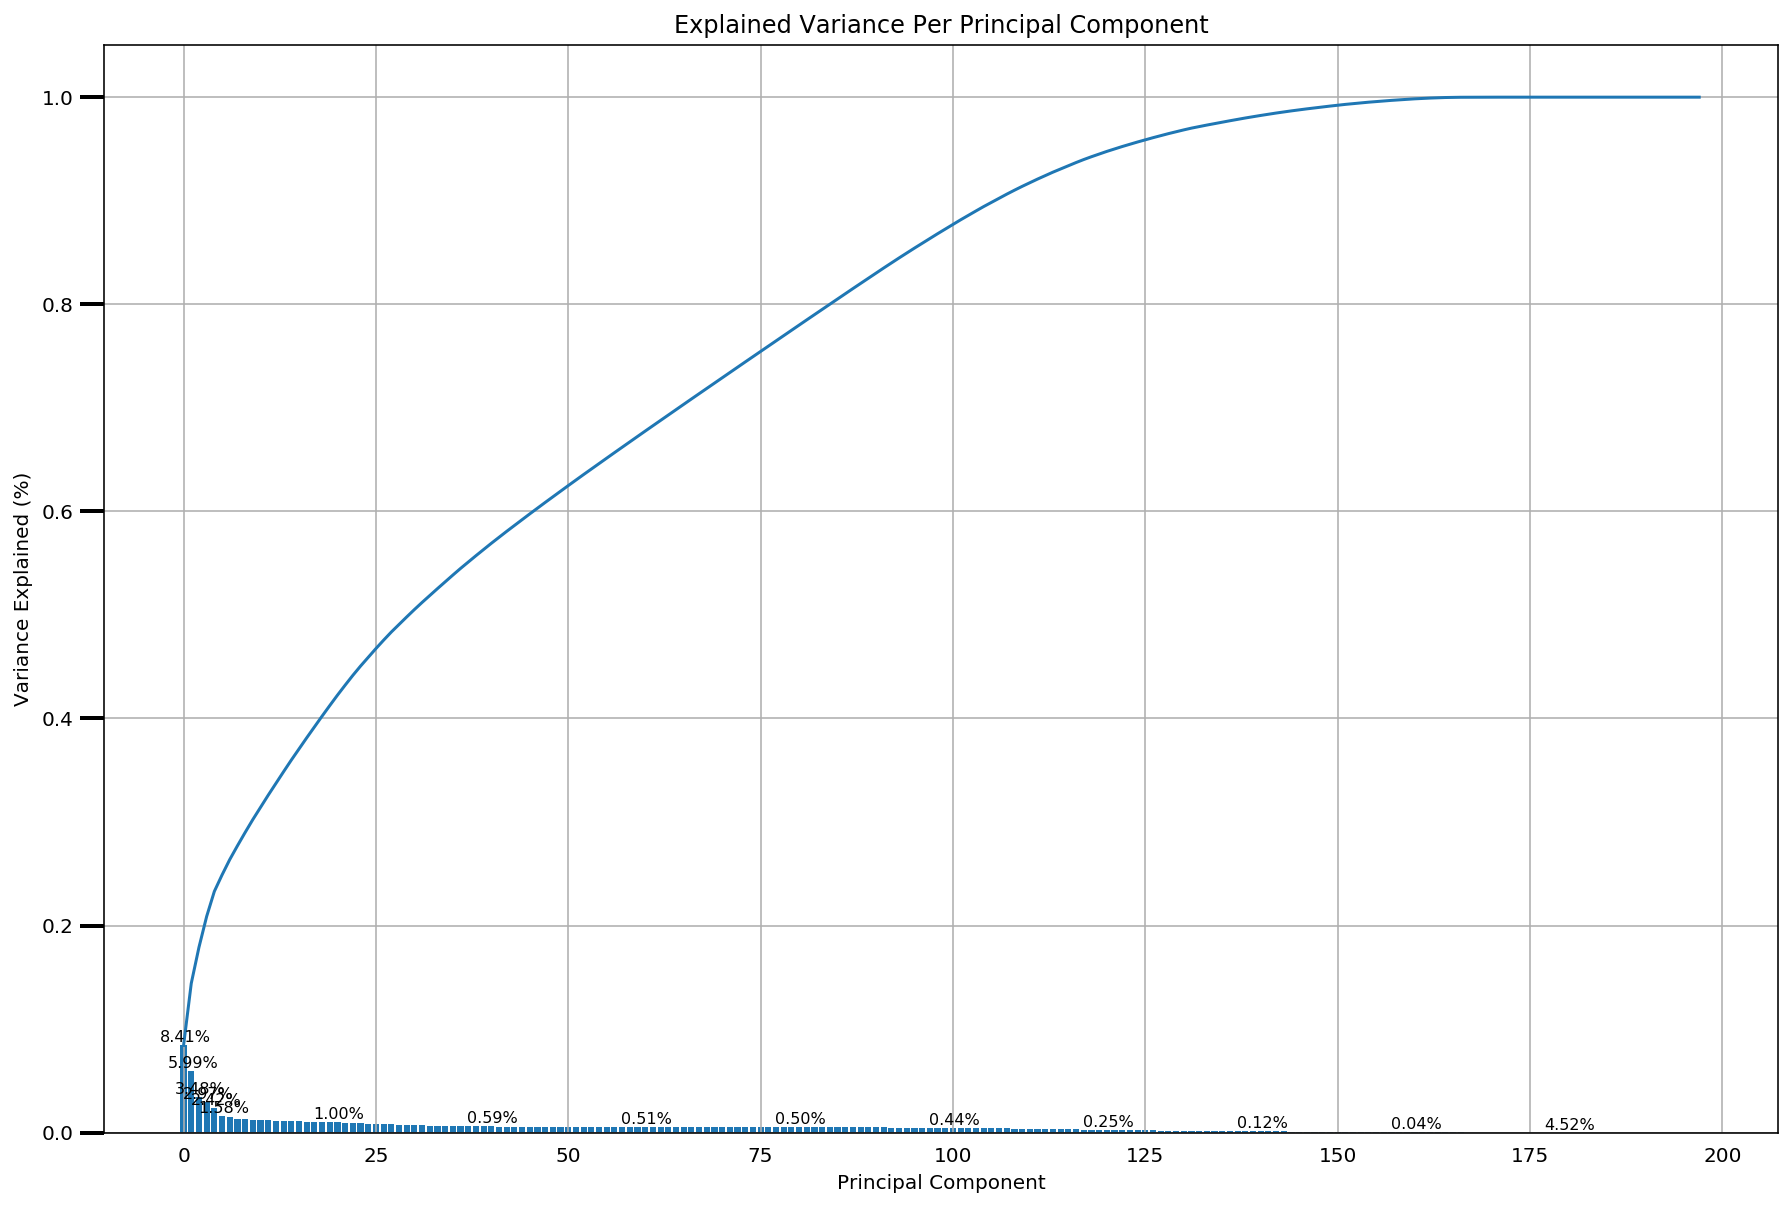

In [54]:
scree_plot(pca)

In [55]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(80)
pca_features = pca.fit_transform(df_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

**Report your findings and decisions regarding dimensionality reduction**
1. How many principal components / transformed features are you retaining for the next step of the analysis?
> * I selected to retain 80 transformed features as that seems to explain about 80% of the variance in the data
>> * 80% seems like a good rule of thumb to stay above

> * I would like to select 115 features, but in doing so I will not be much further from the initial amount of features I began with and would have not found much of a balance in variability explained and dimensionality reduced

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [56]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def plot_pca(df, pca, n):
    '''
    Plot the features with the most absolute variance for given pca component 
    '''
    df_1 = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys()).iloc[n-1]
    df_1.sort_values(ascending=False, inplace=True)
    df_1 = pd.concat([df_1.head(5), df_1.tail(5)])
    
    df_1.plot(kind='bar', title='Component ' + str(n))
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)
    ax.set_axisbelow(True)
    plt.show()

    num_out = 10
    
    if(n <= len(pca.components_)):
        df_2 = pd.DataFrame({'weight': pca.components_[n],
                                        'name': df.columns})
        df_2 = df_2.sort_values(by='weight', ascending=False)
        print('Top {} Principal Components \n {}'.format(num_out, df_2.iloc[:num_out,:]))
        print('\n Bottom {} Principal Components \n {}'.format(num_out, df_2.iloc[-num_out:,:]))
            
    else:
        print('Error in selecting component')
    
# Seeing some conflict with this, but the expected output is occuring with the textual report

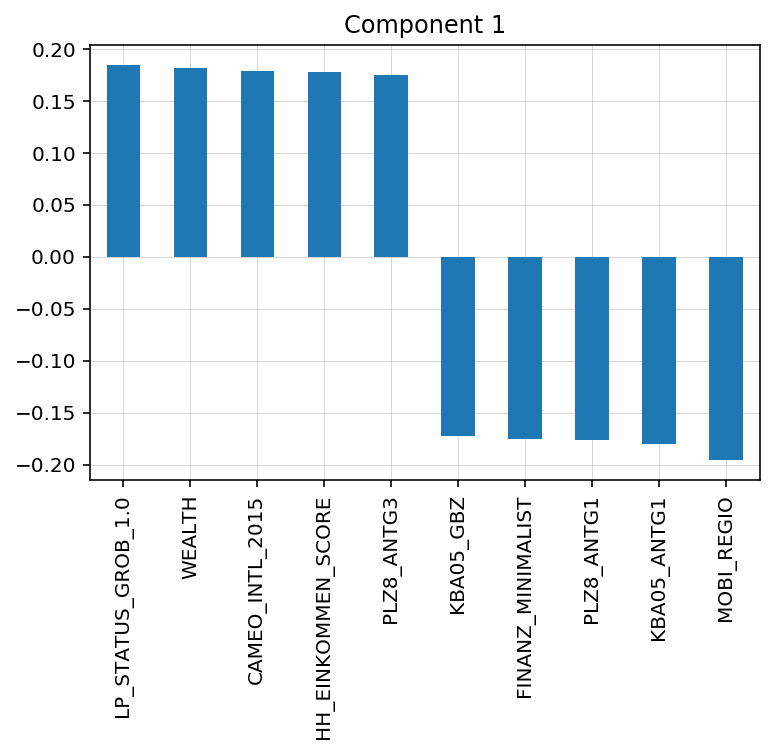

Top 10 Principal Components 
        weight                  name
0    0.228848  ALTERSKATEGORIE_GROB
4    0.219222      FINANZ_VORSORGER
130  0.193922            ZABEOTYP_3
20   0.171033             SEMIO_ERL
19   0.159728            SEMIO_LUST
13   0.152551        RETOURTYP_BK_S
33   0.125651        W_KEIT_KIND_HH
67   0.107267     CJT_GESAMTTYP_2.0
2    0.097399     FINANZ_MINIMALIST
73   0.096261           FINANZTYP_2

 Bottom 10 Principal Components 
        weight                   name
53  -0.156513      ONLINE_AFFINITAET
22  -0.166892              SEMIO_RAT
26  -0.199504          SEMIO_PFLICHT
5   -0.202333         FINANZ_ANLEGER
27  -0.202738            SEMIO_TRADV
16  -0.205151              SEMIO_REL
6   -0.212075  FINANZ_UNAUFFAELLIGER
3   -0.227974          FINANZ_SPARER
194 -0.239944                 DECADE
12  -0.242576  PRAEGENDE_JUGENDJAHRE


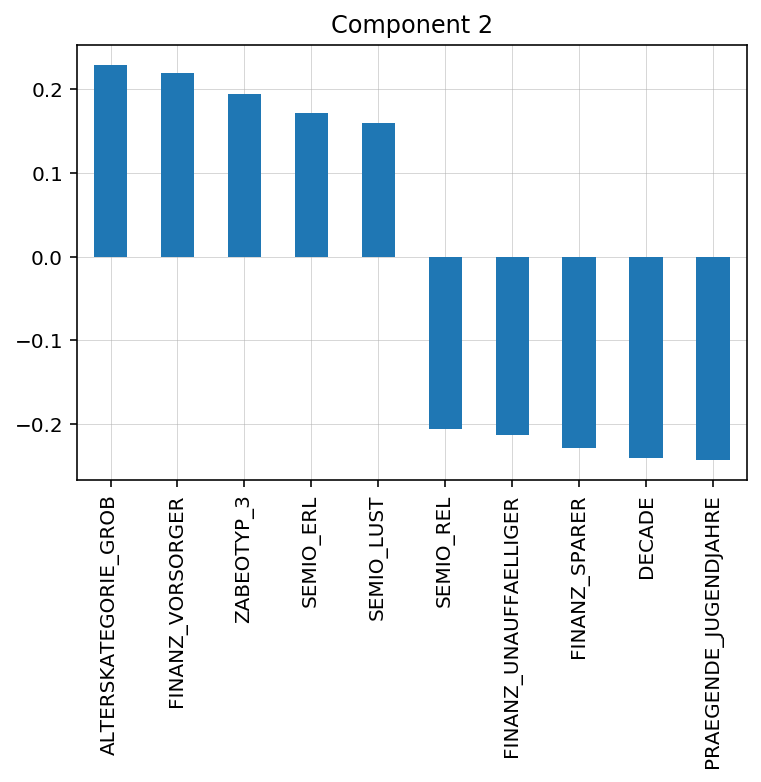

Top 10 Principal Components 
        weight               name
18   0.315423         SEMIO_VERT
15   0.260938          SEMIO_FAM
14   0.254736          SEMIO_SOZ
21   0.253698         SEMIO_KULT
76   0.132190        FINANZTYP_5
2    0.128712  FINANZ_MINIMALIST
124  0.120978    SHOPPER_TYP_0.0
128  0.119918         ZABEOTYP_1
16   0.116527          SEMIO_REL
17   0.094259          SEMIO_MAT

 Bottom 10 Principal Components 
        weight                name
107 -0.077632  LP_STATUS_FEIN_2.0
126 -0.091611     SHOPPER_TYP_2.0
72  -0.096920         FINANZTYP_1
22  -0.147381           SEMIO_RAT
5   -0.149498      FINANZ_ANLEGER
20  -0.211765           SEMIO_ERL
23  -0.269311          SEMIO_KRIT
24  -0.279728           SEMIO_DOM
25  -0.311353          SEMIO_KAEM
1   -0.341317           ANREDE_KZ


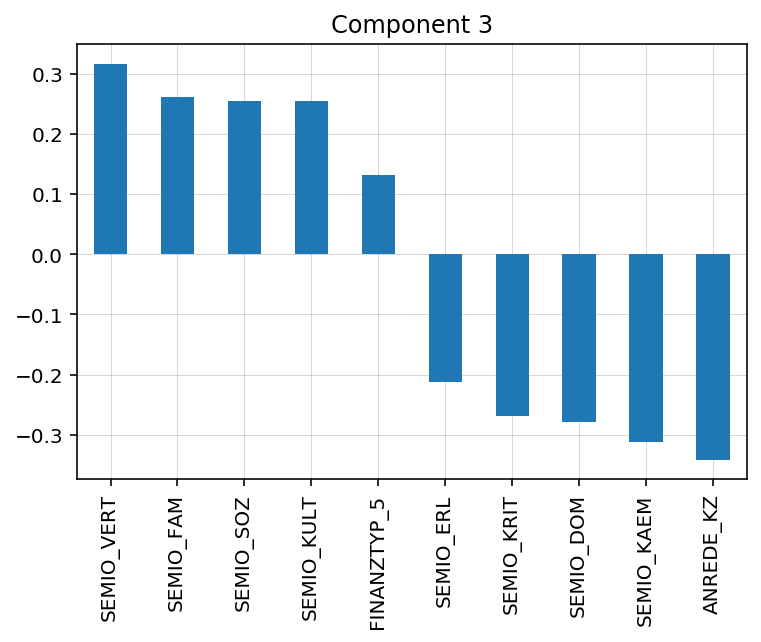

Top 10 Principal Components 
        weight                 name
11   0.244254  LP_LEBENSPHASE_GROB
10   0.242231  LP_LEBENSPHASE_FEIN
30   0.213396         ANZ_PERSONEN
105  0.211767  LP_FAMILIE_GROB_5.0
195  0.198760           AVANTGARDE
8    0.198760     GREEN_AVANTGARDE
64   0.187477          ORTSGR_KLS9
48   0.185538             EWDICHTE
120  0.171549   LP_STATUS_GROB_5.0
115  0.171549  LP_STATUS_FEIN_10.0

 Bottom 10 Principal Components 
        weight                 name
32  -0.100090   HH_EINKOMMEN_SCORE
114 -0.121134   LP_STATUS_FEIN_9.0
109 -0.129223   LP_STATUS_FEIN_4.0
119 -0.137467   LP_STATUS_GROB_4.0
47  -0.144629             BALLRAUM
49  -0.150477           INNENSTADT
33  -0.156887       W_KEIT_KIND_HH
40  -0.164398             WOHNLAGE
90  -0.231498  LP_FAMILIE_FEIN_1.0
101 -0.231498  LP_FAMILIE_GROB_1.0


In [57]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
for i in range(1,4):
    plot_pca(df_scaled, pca, i)


### Discussion 2.3: Interpret Principal Components

**Report your observations from detailed investigation of the first few principal components generated**
1. Can we interpret positive and negative values from them in a meaningful way?

* Each principal component is a unit vector in the direction of highest variance; dependent on the variance accounted for by earlier principal components
* The larger the absolute value, the larger the amount of variance the principal component accounts for in the direction of the corresponding feature
* If features have large weights with shared parity, then changes in one tend expect to be associated with changes in the other in the same direction
> * Features with different parity (signs) can be expected to show a negative correlation; changes in one are associated with changes in the opposite direction for the other

#### Principal Comp. 1
Top Positive:
* ALTERSKATEGORIE_GROB (0.228848):
* FINANZ_VORSORGER (0.219222):
* ZABEOTYP_3 (0.193922):

Top Negative
* PRAEGENDE_JUGENDJAHRE (-0.242576):
* DECADE (-0.239944):
* FINANZ_SPARER (-0.227974):

#### Principal Comp. 2
Top Positive:
* SEMIO_VERT (0.315421):
* SEMIO_FAM (0.260936):
* SEMIO_SOZ (0.254736):

Top Negative
* ANREDE_KZ (-0.341315):
* SEMIO_KAEM (-0.311352):
* SEMIO_DOM (-0.279728):

#### Principal Comp. 3
Top Positive:
* LP_LEBENSPHASE_GROB (0.244254):
* LP_LEBENSPHASE_FEIN (0.242231):
* ANZ_PERSONEN (0.213398):

Top Negative
* LP_FAMILIE_GROB_1.0 (-0.231499):
* LP_FAMILIE_FEIN_1.0 (-0.231499):
* WOHNLAGE (-0.164394):

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [ ]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.
import time
from sklearn.cluster import KMeans
start_time = time.time()

sse = []
k_range = np.arange(5, 25)

for k in k_range:
    kmeans = KMeans(k).fit(pca_features)
    sse.append(np.abs(kmeans.score(pca_features)))
    
plt.plot(k_range, sse, linestyle='-', marker='o');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')

print('Time Passed: {} mins'.format(np.round(((time.time() - start_time)/60),2)))

In [ ]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.



In [ ]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.



### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [ ]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [ ]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
features_customers = clean_data(customers)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [ ]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.



In [ ]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?



In [ ]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?



### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.